In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import gc
import glob
import imageio.v2
import os
from IPython import display
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.patheffects as PathEffects

In [2]:
df = pd.read_csv('./saved-files/threshold-10/Features-10.csv')
df1 = pd.read_csv('./saved-files/threshold-15/Features-15.csv')
df2 = pd.read_csv('./saved-files/threshold-20/Features-20.csv')
df.head()

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,projection_y_coordinate,projection_x_coordinate,latitude,longitude
0,0,1,94.566045,308.115181,5,10,1,2020-03-13 00:00:00,2020-03-13 00:00:00,-2.154566e+06,225115.180751,70.503822,15.964784
1,0,2,109.140243,299.415282,14,10,2,2020-03-13 00:00:00,2020-03-13 00:00:00,-2.169140e+06,216415.282348,70.379987,15.697549
2,0,3,114.620052,324.589396,8,10,3,2020-03-13 00:00:00,2020-03-13 00:00:00,-2.174620e+06,241589.395814,70.306404,16.339280
3,0,4,120.269461,312.957325,14,10,4,2020-03-13 00:00:00,2020-03-13 00:00:00,-2.180269e+06,229957.324986,70.266699,16.020838
4,0,5,119.800236,294.978233,11,10,5,2020-03-13 00:00:00,2020-03-13 00:00:00,-2.179800e+06,211978.232992,70.287442,15.554357


Text(0.5, 0, 'Longitude')

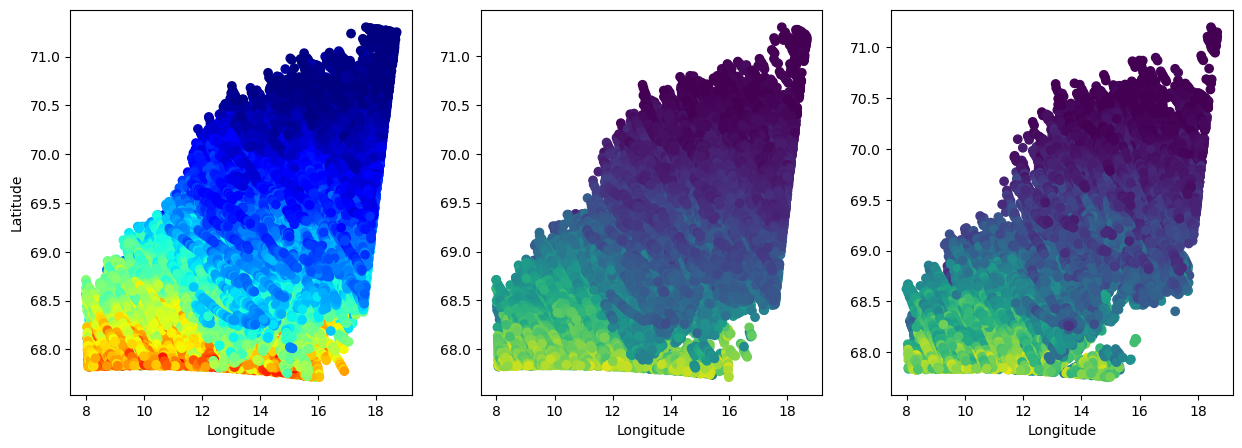

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax =ax.flatten()

ax[0].scatter(df['longitude'], df['latitude'], c=df['idx'], cmap='jet')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

ax[1].scatter(df1['longitude'], df1['latitude'], c=df1['idx'])
ax[1].set_xlabel('Longitude')

ax[2].scatter(df2['longitude'], df2['latitude'], c=df2['idx'])
ax[2].set_xlabel('Longitude')

In [3]:
import warnings
warnings.simplefilter("default")


In [4]:
import iris
from iris.pandas import as_cubes

In [5]:
data_path = './saved-files/threshold-10/Mask_ERF_iris-10.nc'
data_path1 = './saved-files/threshold-15/Mask_ERF_iris-15.nc'
data_path2 = './saved-files/threshold-20/Mask_ERF_iris-20.nc'

In [6]:
data = iris.load_cube(data_path)
data1 = iris.load_cube(data_path1)
data2 = iris.load_cube(data_path2)

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [8]:
# #segmentation
seg = xr.DataArray.from_iris(data)
seg1 = xr.DataArray.from_iris(data1)
seg2 = xr.DataArray.from_iris(data2)
seg2

<xarray.DataArray 'segmentation_mask' (time: 360, dim_1: 400, dim_2: 400)>
dask.array<filled, shape=(360, 400, 400), dtype=int32, chunksize=(180, 400, 400), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-03-13 ... 2020-03-14T05:55:00
    lat      (dim_1, dim_2) float32 ...
    lon      (dim_1, dim_2) float32 ...
Dimensions without coordinates: dim_1, dim_2
Attributes:
    long_name:    segmentation_mask
    Conventions:  CF-1.7

In [9]:
M = seg.mean(dim='time')
M1 = seg1.mean(dim='time')
M2 = seg2.mean(dim='time')


In [10]:
# fig, ax = plt.subplots(figsize=(9,8), nrows=1, ncols=3)
# ax = ax.flatten()
# ax[0].contour(M['lon'], M['lat'], M, cmap='jet')
# ax[1].contour(M1['lon'], M1['lat'], M1, cmap='jet')
# ax[2].contour(M2['lon'], M2['lat'], M2, cmap='jet')

# ax[0].scatter(df['longitude'], df['latitude'], c=df['idx'], cmap='jet', alpha=0.5)
# ax[1].scatter(df1['longitude'], df1['latitude'], c=df1['idx'], cmap='jet', alpha=0.5)
# ax[2].scatter(df2['longitude'], df2['latitude'], c=df2['idx'], cmap='jet', alpha=0.5)

/glade/work/noteng/conda-envs/tobac-env/lib/python3.11/site-packages/cartopy/crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)
/glade/work/noteng/conda-envs/tobac-env/lib/python3.11/site-packages/cartopy/crs.py:827: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  multi_line_string = cartopy.trace.project_linear(linear_ring,


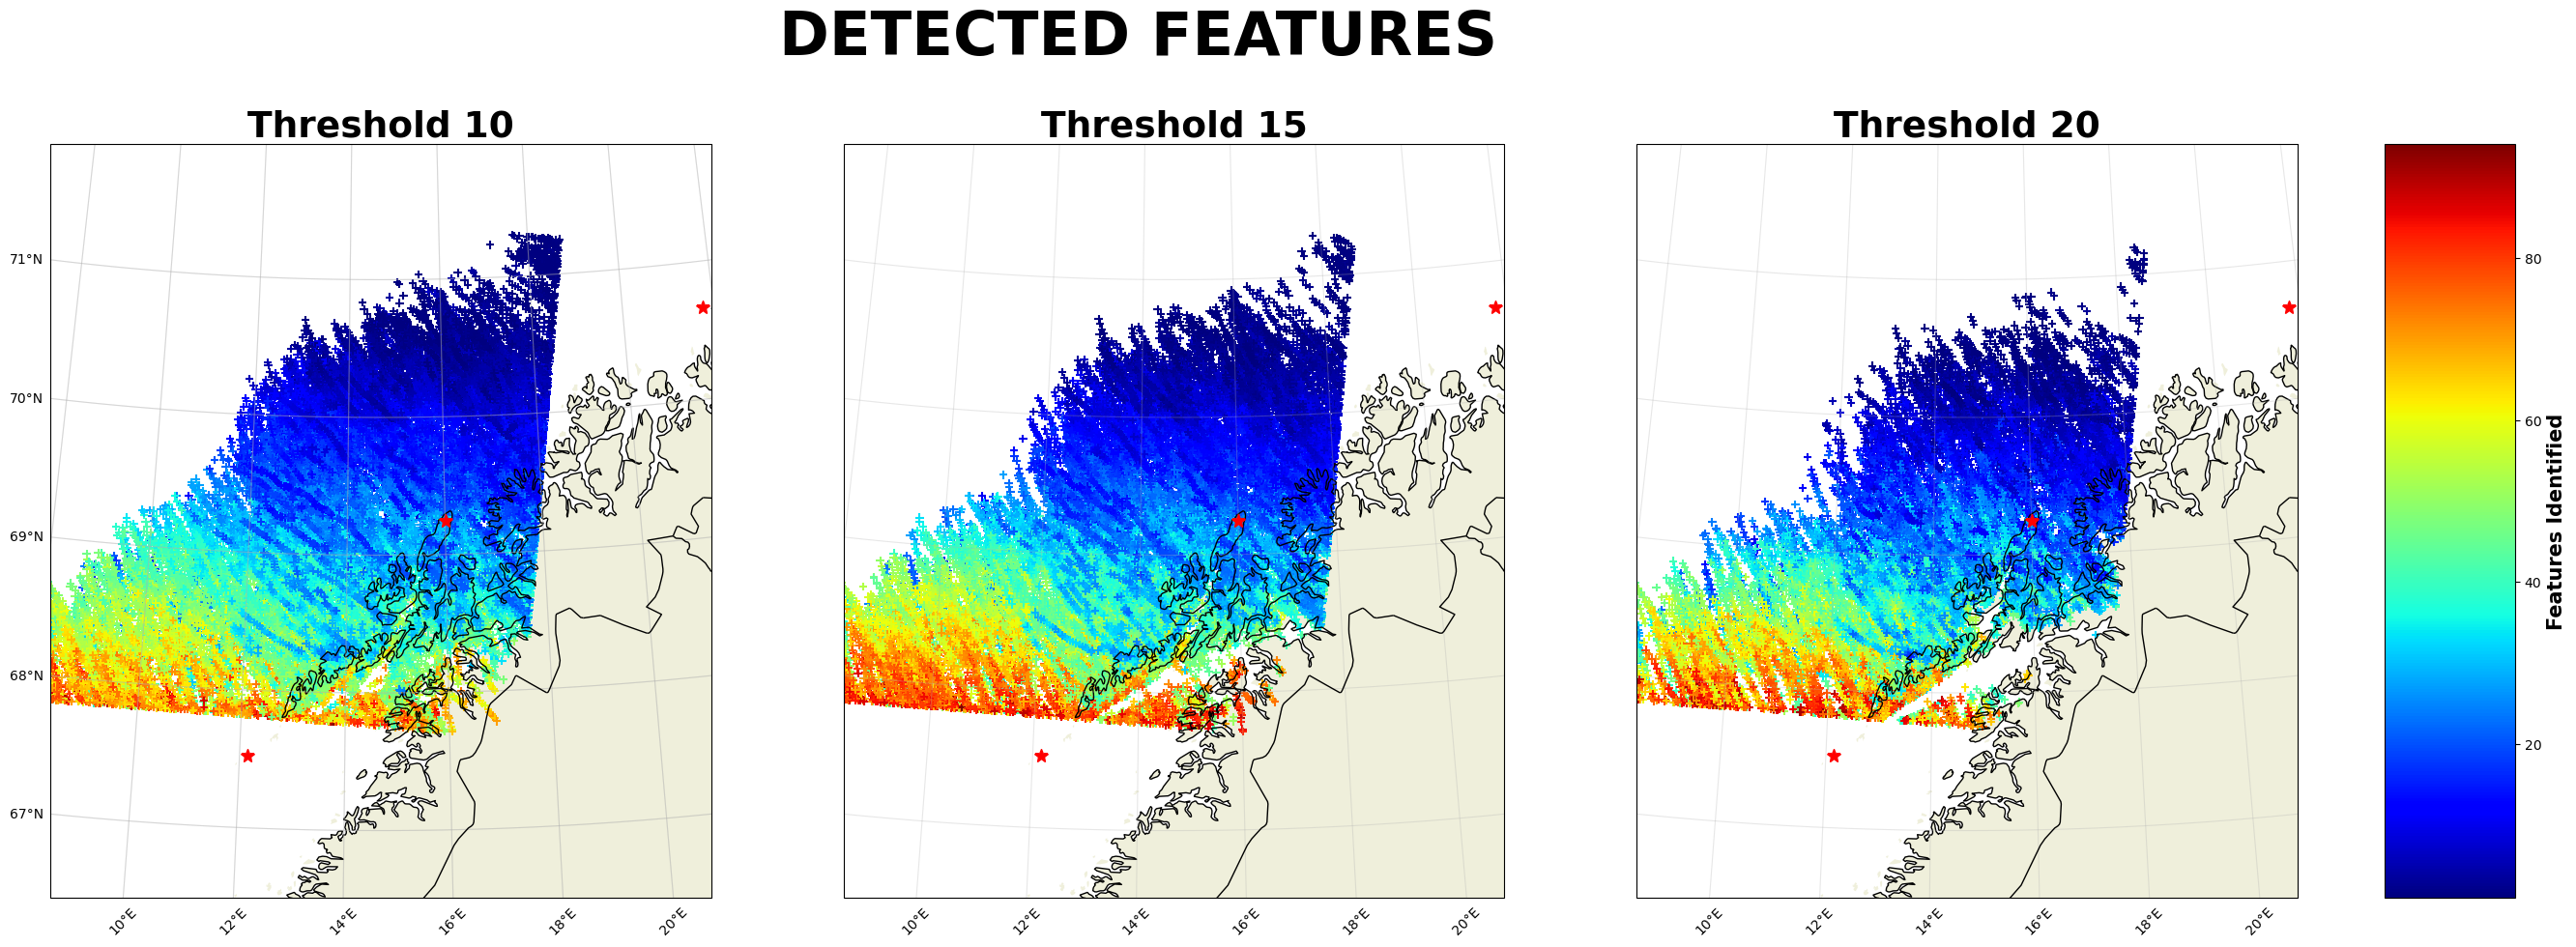

In [13]:
latA = 69.141281  # latitude of COMBLE site
lonA = 15.684166-1  # longitude of COMBLE site -1
xm, ym = 6, 2.75  # extent from center point in lon and lat


fig, ax = plt.subplots(figsize=(30, 20), nrows=1, ncols=3, subplot_kw={
                               'projection': ccrs.Orthographic(lonA, latA)})
ax = ax.flatten()
thresholds = [10, 15, 20]
for i, v in enumerate(ax):
    # set extent
    extent = [lonA-xm, lonA+xm, latA-ym, latA+ym]
    ax[i].set_extent(extent)  # set extent of map


    # plotting coastlines at a very high resolution: 10m
    ax[i].coastlines(resolution='10m')
    # add borders
    ax[i].add_feature(cfeature.BORDERS, zorder=7)
    # add land
    ax[i].add_feature(cfeature.LAND, linewidth=1.5, alpha=1)
  
   
    # add grid lines
    gl = ax[i].gridlines(x_inline=False, alpha=0.3); gl.bottom_labels=True; gl.left_labels=False
    gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'rotation': 45}; gl.ylabel_style = {'color': 'black'} 

    # Radar locations
    ax[i].plot(16.00297, 69.24139, color='red', marker='*', markersize=10.5,
            transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location of Radar Andoya
    ax[i].plot(12.1544, 67.5264, color='red', marker='*', markersize=10.5,
            transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at SW
    ax[i].plot(21.7544, 70.664, color='red', marker='*', markersize=10.5,
            transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at NE

    ax[i].set_title(f"Threshold {thresholds[i]}", fontweight='bold', fontsize=27)

    if i == 0:
        gl = ax[i].gridlines(x_inline=False, alpha=0.3); gl.bottom_labels=False; gl.left_labels=True
        cs = ax[i].scatter(df['longitude'], df['latitude'], marker='+',c=df['idx'], cmap='jet', transform=ccrs.PlateCarree())

    if i == 1:
        cs = ax[i].scatter(df1['longitude'], df1['latitude'], marker='+',c=df1['idx'], cmap='jet', transform=ccrs.PlateCarree())

    
    if i == 2:
        cs = ax[i].scatter(df2['longitude'], df2['latitude'], marker='+',c=df2['idx'], cmap='jet', transform=ccrs.PlateCarree())

# # # # Add a colorbar axis at the right of the graph
cbar_ax = fig.add_axes([0.93, 0.30, 0.045, 0.39])  # lbwh

cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical')
cbar.set_label("Features Identified", fontsize=15, fontweight='bold')

fig.suptitle('DETECTED FEATURES', y=0.76, fontweight='bold', fontsize=45)
fig.savefig(f'./images/features-identified.png', bbox_inches='tight',dpi=600)

/glade/work/noteng/conda-envs/tobac-env/lib/python3.11/site-packages/cartopy/crs.py:814: DeprecationWarning: The 'geom_factory' function is deprecated in Shapely 2.0, and will be removed in a future version
  return cartopy.trace.project_linear(geometry, src_crs, self)
HDF5-DIAG: Error detected in HDF5 (1.12.2) thread 1:
  #000: H5A.c line 528 in H5Aopen_by_name(): can't open attribute
    major: Attribute
    minor: Can't open object
  #001: H5VLcallback.c line 1091 in H5VL_attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #002: H5VLcallback.c line 1058 in H5VL__attr_open(): attribute open failed
    major: Virtual Object Layer
    minor: Can't open object
  #003: H5VLnative_attr.c line 130 in H5VL__native_attr_open(): can't open attribute
    major: Attribute
    minor: Can't open object
  #004: H5Aint.c line 545 in H5A__open_by_name(): unable to load attribute info from object header
    major: Attribute
    minor: Unable to initialize

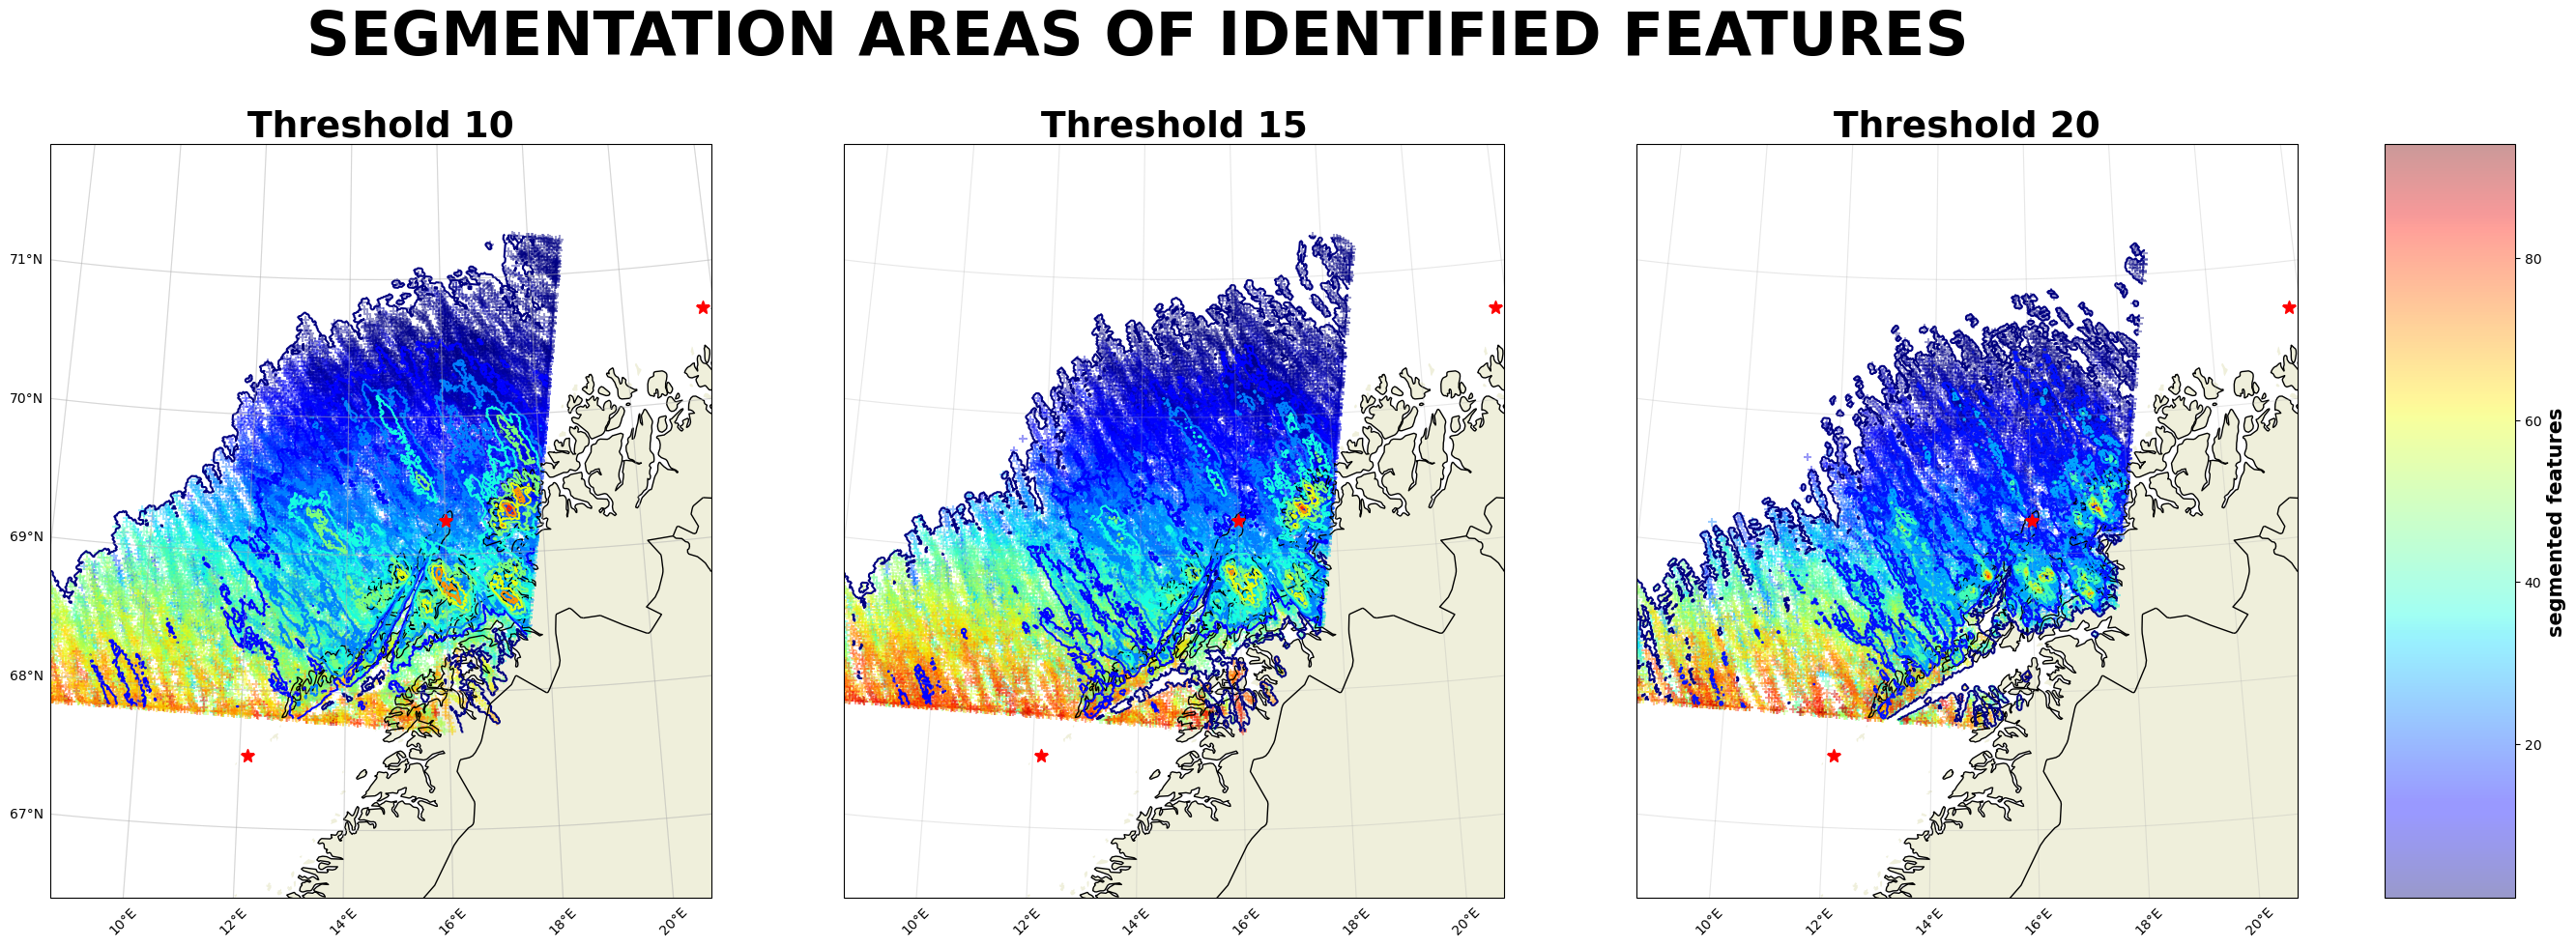

In [14]:
latA = 69.141281  # latitude of COMBLE site
lonA = 15.684166-1  # longitude of COMBLE site -1
xm, ym = 6, 2.75  # extent from center point in lon and lat


fig, ax = plt.subplots(figsize=(30, 20), nrows=1, ncols=3, subplot_kw={
                               'projection': ccrs.Orthographic(lonA, latA)})
ax = ax.flatten()
thresholds = [10, 15, 20]
for i, v in enumerate(ax):
    # set extent
    extent = [lonA-xm, lonA+xm, latA-ym, latA+ym]
    ax[i].set_extent(extent)  # set extent of map
    
    
    # plotting coastlines at a very high resolution: 10m
    ax[i].coastlines(resolution='10m')
    # add borders
    ax[i].add_feature(cfeature.BORDERS, zorder=7)
    # add land
    ax[i].add_feature(cfeature.LAND, linewidth=1.5, alpha=1)
  

   
    # add grid lines
    gl = ax[i].gridlines(x_inline=False, alpha=0.3); gl.bottom_labels=True; gl.left_labels=False
    gl.xformatter = LONGITUDE_FORMATTER; gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'rotation': 45}; gl.ylabel_style = {'color': 'black'} 

    # Radar locations
    ax[i].plot(16.00297, 69.24139, color='red', marker='*', markersize=10.5,
            transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location of Radar Andoya
    ax[i].plot(12.1544, 67.5264, color='red', marker='*', markersize=10.5,
            transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at SW
    ax[i].plot(21.7544, 70.664, color='red', marker='*', markersize=10.5,
            transform=ccrs.PlateCarree(), zorder=8)  # plot red star at location at NE

    ax[i].set_title(f"Threshold {thresholds[i]}", fontweight='bold', fontsize=27)

    if i == 0:
        gl = ax[i].gridlines(x_inline=False, alpha=0.3); gl.bottom_labels=False; gl.left_labels=True
        ax[i].contour(M['lon'], M['lat'], M, cmap='jet', transform=ccrs.PlateCarree())
        cs = ax[i].scatter(df['longitude'], df['latitude'], marker='+',c=df['idx'], cmap='jet', transform=ccrs.PlateCarree(), alpha=0.4)
    if i == 1:
        ax[i].contour(M1['lon'], M1['lat'], M1, cmap='jet', transform=ccrs.PlateCarree())
        cs = ax[i].scatter(df1['longitude'], df1['latitude'], marker='+',c=df1['idx'], cmap='jet', transform=ccrs.PlateCarree(), alpha=0.4)
    if i == 2:
        ax[i].contour(M2['lon'], M2['lat'], M2, cmap='jet', transform=ccrs.PlateCarree())
        cs = ax[i].scatter(df2['longitude'], df2['latitude'], marker='+',c=df2['idx'], cmap='jet', transform=ccrs.PlateCarree(), alpha=0.4)

# # # # Add a colorbar axis at the right of the graph
cbar_ax = fig.add_axes([0.93, 0.30, 0.045, 0.39])  # lbwh

cbar = fig.colorbar(cs, cax=cbar_ax, orientation='vertical' )
cbar.set_label("segmented features", fontsize=15, fontweight='bold')

fig.suptitle('SEGMENTATION AREAS OF IDENTIFIED FEATURES', y=0.76, fontweight='bold', fontsize=45)
fig.savefig(f'./images/segmentation-features-identified.png', bbox_inches='tight',dpi=600)